# Introduction

- Name : Amar Ma'ruf
- Batch : 05
- Task : Milestone 2(Phase 1)
- Objective : Create system that can predict range price of cellphones

# Import Library

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import *
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.pipeline import *
from sklearn.neighbors import *
from sklearn.metrics import *

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [52]:
#For showing all of datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [53]:
#This is data test for later
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [54]:
#For showing more information data like rows, missing value, and type data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [55]:
#For showing statistical numeric data
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [56]:
X = df_train.drop(columns='price_range')
y = df_train['price_range']
X.shape, y.shape

((2000, 20), (2000,))

Before start doing explore and pre-processing, we need to do split `Feature Column` and `Target Column` also split both of them into `Train` and `Test` data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.shape, X_test.shape

((1400, 20), (600, 20))

# Data Exploring (EDA)

As we know, all data are numeric type, now we gonna explore to see is there some insight that we might get

In [58]:
#For visualization purpose, we change target column from numeric to categorical data
df_copy_train = df_train.copy()
df_copy_train['price_range'] = df_copy_train['price_range'].map({0: 'Cheap', 1: 'Standard', 2: 'Expensive', 3: 'High Class'})
df_copy_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,Standard
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,Expensive
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,Expensive
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,Expensive
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,Cheap
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,Expensive
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,High Class
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,Cheap


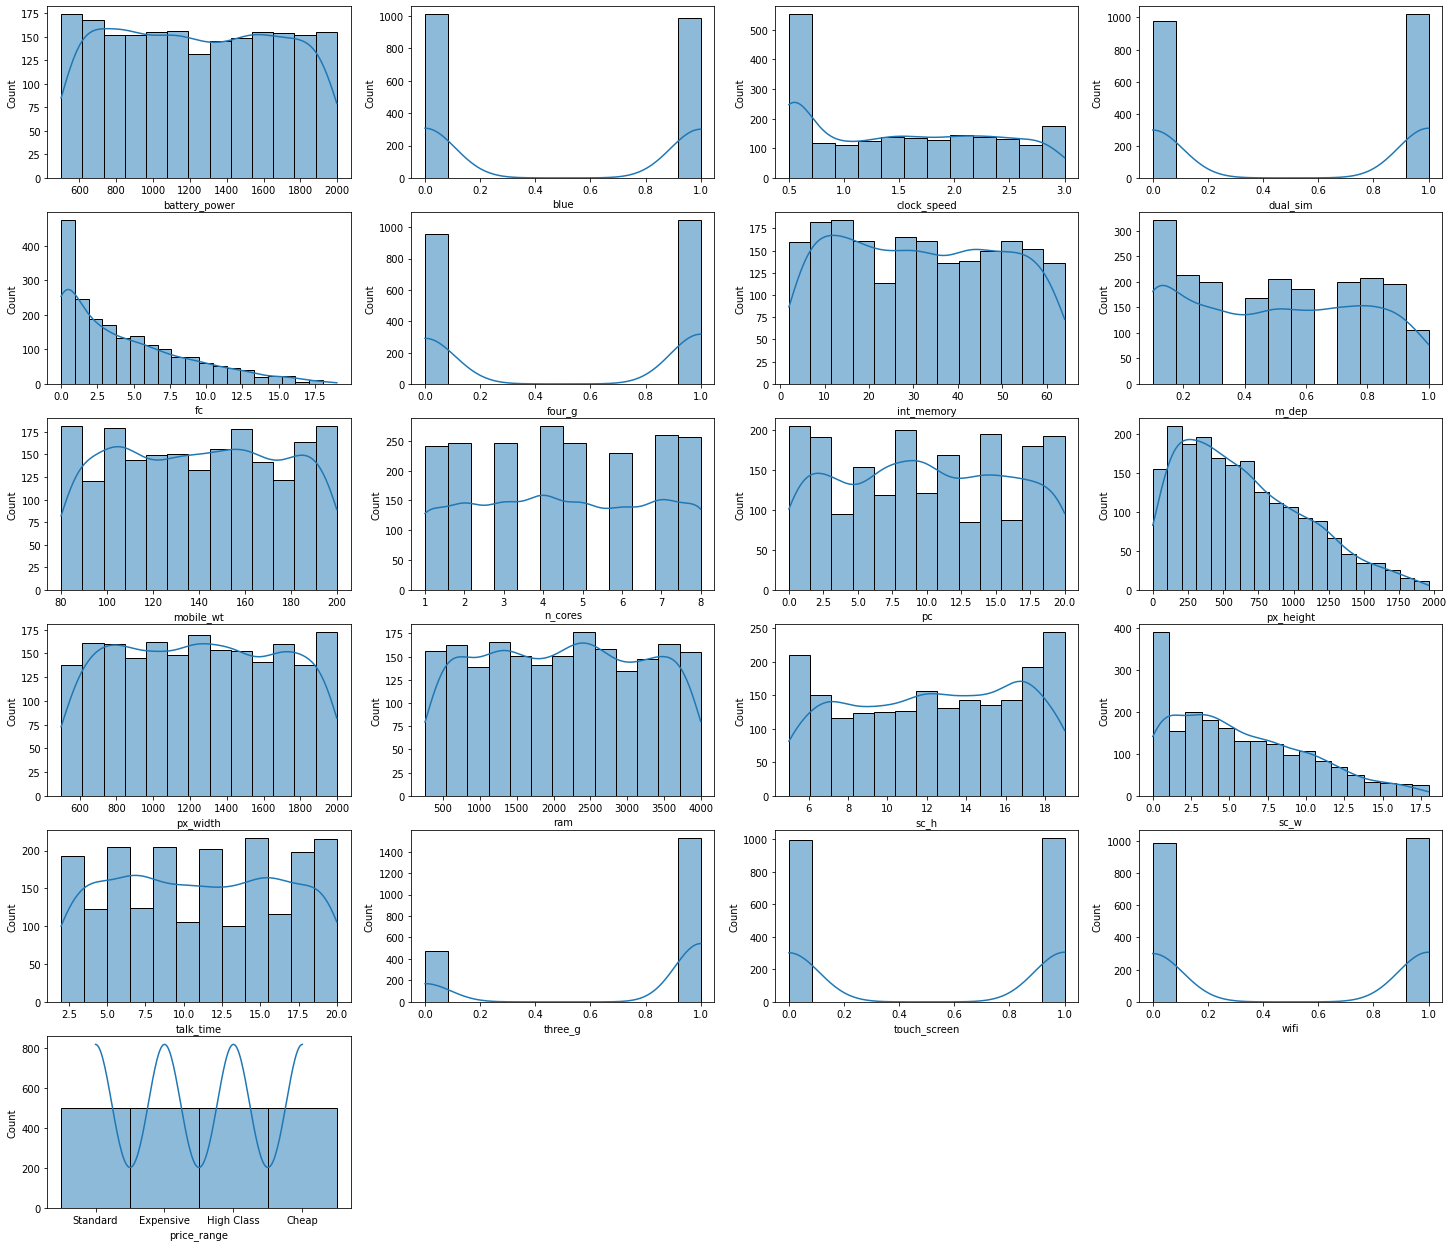

In [59]:
plt.figure(figsize=(25,60))
for i, col in enumerate(df_copy_train):
    ax = plt.subplot(16, 4, i+1)
    sns.histplot(data=df_copy_train, x=col, kde=True ,ax=ax)
plt.show()


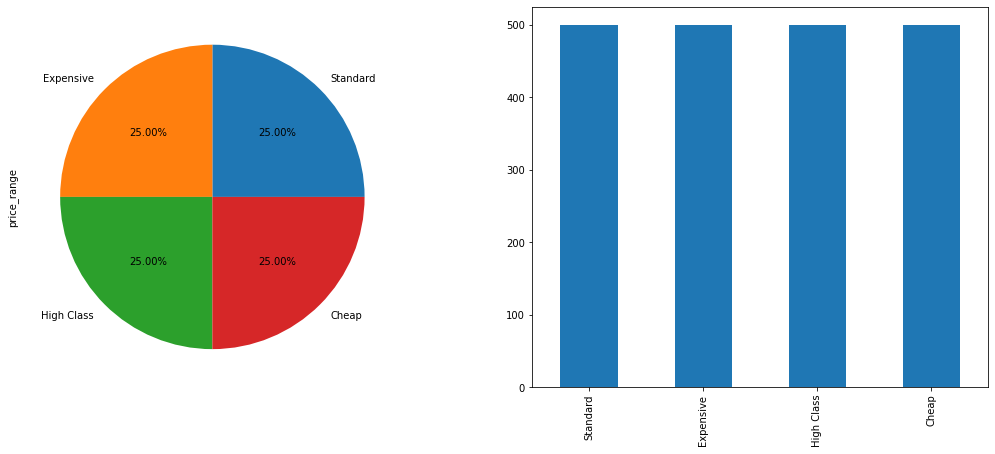

In [60]:
fig, ax = plt.subplots(ncols=2, figsize=(18, 7))
df_copy_train['price_range'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[0])
df_copy_train['price_range'].value_counts().plot(kind='bar', ax=ax[1])
plt.show()

Distribution of `Target Column` suprisingly equaly distributed, maybe person who collect this data from the begining want to try to compare all cellphone by their specifications equally

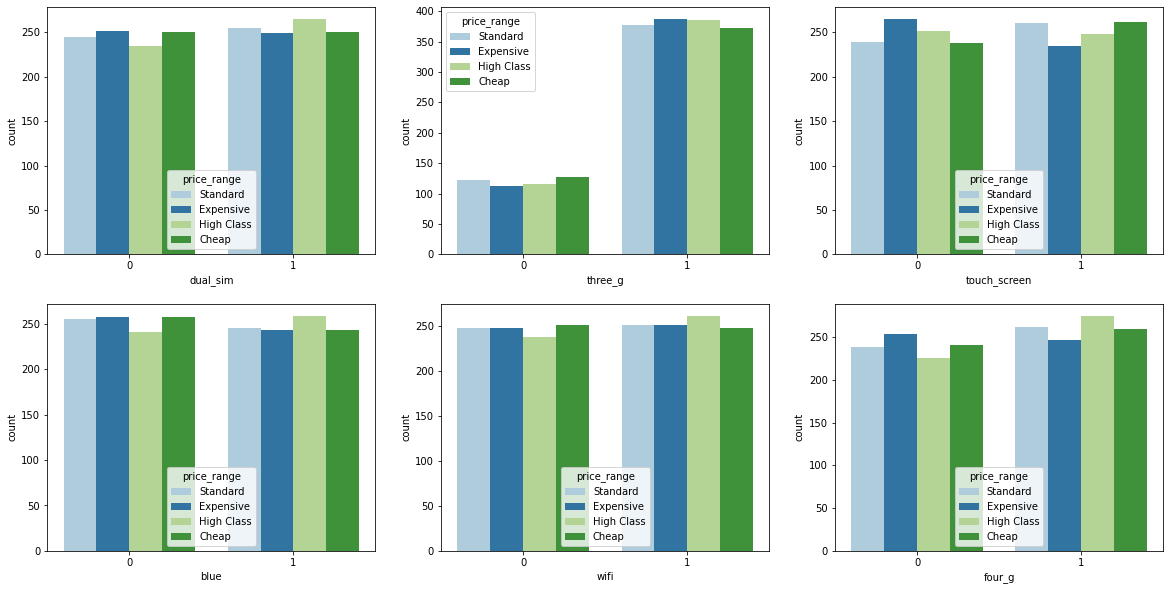

In [61]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
sns.countplot(data = df_copy_train, x= 'dual_sim', hue='price_range', ax=ax[0, 0], palette="Paired")
sns.countplot(data = df_copy_train, x= 'three_g', hue='price_range', ax=ax[0, 1], palette="Paired")
sns.countplot(data = df_copy_train, x= 'touch_screen', hue='price_range', ax=ax[0, 2], palette="Paired")
sns.countplot(data = df_copy_train, x= 'blue', hue='price_range', ax=ax[1, 0], palette="Paired")
sns.countplot(data = df_copy_train, x= 'wifi', hue='price_range', ax=ax[1, 1], palette="Paired")
sns.countplot(data = df_copy_train, x= 'four_g', hue='price_range', ax=ax[1, 2], palette="Paired")
plt.show()


In [62]:
df_copy_train.groupby('touch_screen')['price_range'].value_counts()

touch_screen  price_range
0             Expensive      265
              High Class     252
              Standard       239
              Cheap          238
1             Cheap          262
              Standard       261
              High Class     248
              Expensive      235
Name: price_range, dtype: int64

In [63]:
df_copy_train.groupby('blue')['price_range'].value_counts()

blue  price_range
0     Cheap          257
      Expensive      257
      Standard       255
      High Class     241
1     High Class     259
      Standard       245
      Cheap          243
      Expensive      243
Name: price_range, dtype: int64

We can say that:
- Cellphone who support `Dual Sim` slightly have more unit, maybe it's because people need dual phone number to split works and personal life 
- Make sense for this digital era, there is more phone who support `3G`, even for now some of new phone already support `4G`
- Suprisingly phone who doesn't support `Touch Screen` has more unit and more expensive than their rival who support with it, maybe it's because `old phones ` used to be sold expensive and nowadays you can get new phone with high specifications compare to old phone but with less price
- As I said before that `Old Phone` with less technology like `Touch Screen` and `Bluetooth` more pricey than phone these days
- For `Wifi` and `4G` that only support in phone these days of course more pricey than old phones

Hypothesis:
> This data take information of `Sold Cellphones` from 2000 - 2021 (now), because Cellphones under 2010 didn't have feature like cellphones nowadays and those cellphones tend to be expensive compare to cellphone this days

In [64]:
# sns.set_theme(style="ticks")
#sns.pairplot(df_copy_train, hue='price_range')
#plt.show()

After rerun the pairplot, we only get `RAM` that really affect the price of a cellphone. As you can see, more `RAM` you have on your phone, more expensive it will be. So here details of how `RAM` affect other `Features`

Before that we gonna change `sc_h` and `sc_w` into 1 column with size of inch

In [65]:
df_resize = df_copy_train.copy()
df_resize['dimension'] = np.sqrt((df_resize['sc_h']**2) + (df_resize['sc_w']**2)).astype(int)
df_resize

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,dimension
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,Standard,11
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,Expensive,17
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,Expensive,11
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,Expensive,17
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,Standard,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,Cheap,13
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,Expensive,14
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,High Class,9
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,Cheap,20


In [66]:
df_resize.drop(columns=['sc_h', 'sc_w'], inplace=True)
df_resize['price_range'] = df_train['price_range']

In [67]:
df_resize

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,dimension
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,19,0,0,1,1,11
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,7,1,1,0,2,17
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,9,1,1,0,2,11
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,11,1,0,0,2,17
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,15,1,1,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,19,1,1,0,0,13
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,16,1,1,1,2,14
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,5,1,1,0,3,9
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,19,1,1,1,0,20


We doing this because most people are concerned with screen size in `inches` rather than the length and width of the cellphone screen, and we doing this to make 2 feature with same purpose into 1 (reduce dimensionality feature)

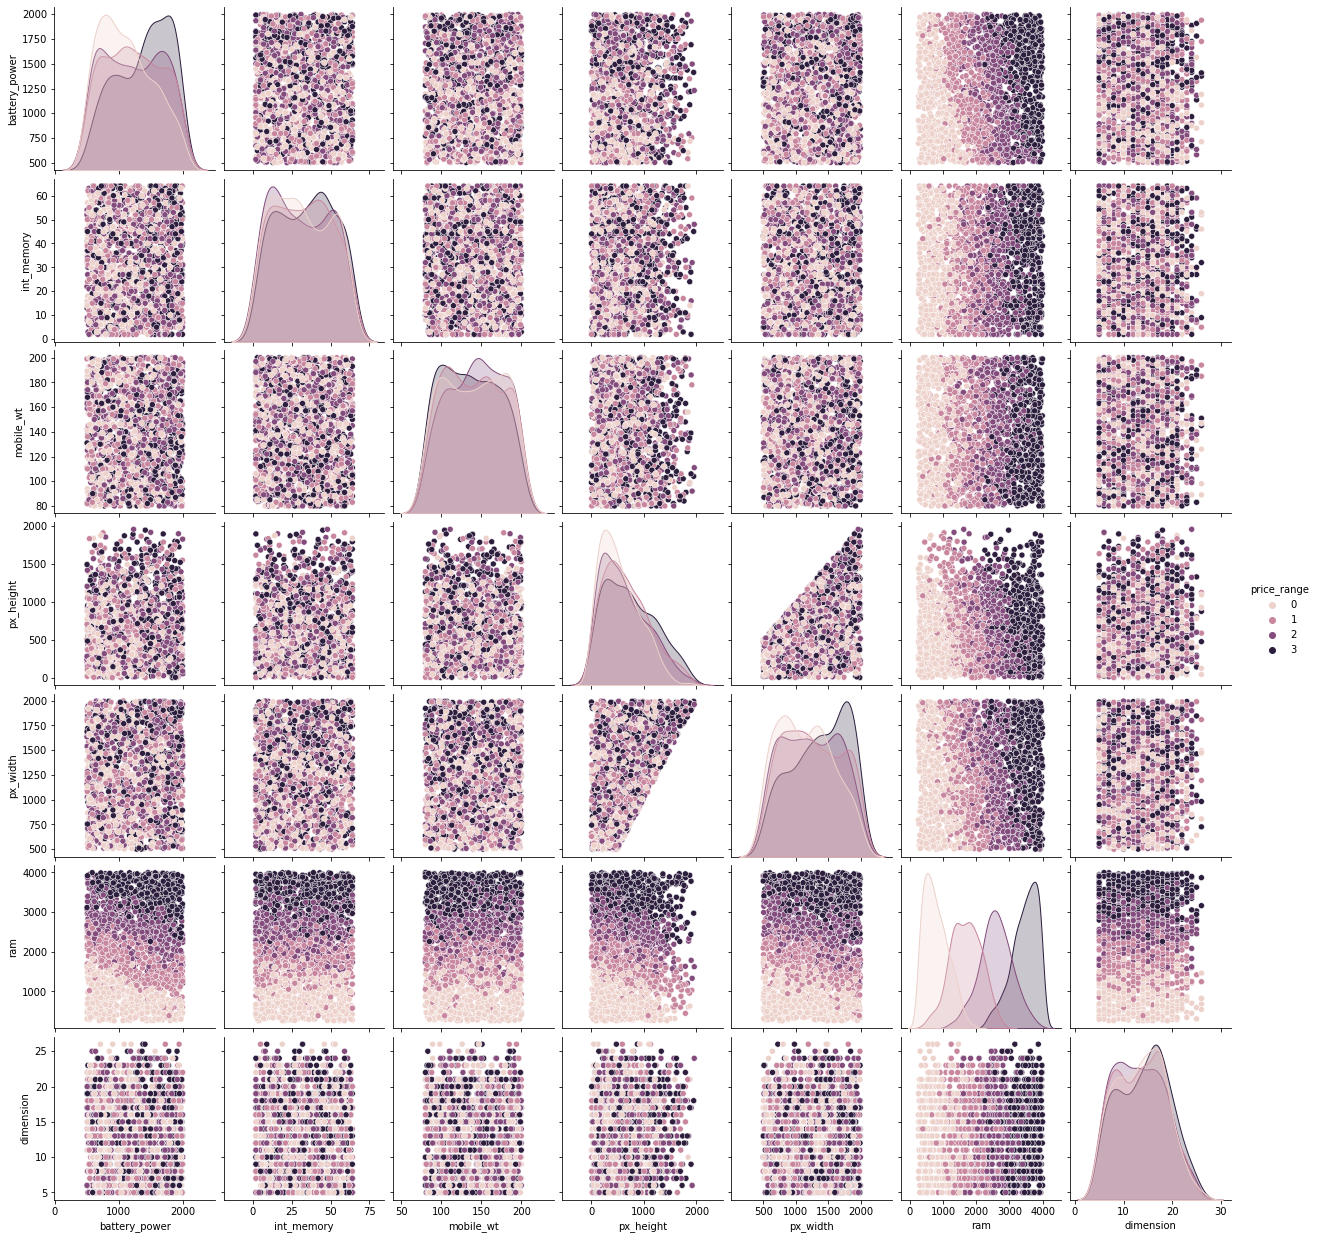

In [68]:
dropped = df_resize.drop(columns=['wifi', 'touch_screen', 'three_g', 'four_g', 
                                      'blue', 'dual_sim', 'm_dep', 'n_cores', 'pc', 
                                      'talk_time', 'clock_speed', 'fc',])
# sns.set_theme(style="ticks")
sns.pairplot(dropped, hue='price_range')
plt.show()

So you see `RAM` the only `Features` that can seperate phone by price, and what you gonna see next it's only my hypothesis that `I think` it's actually what people searching for on a Phone 

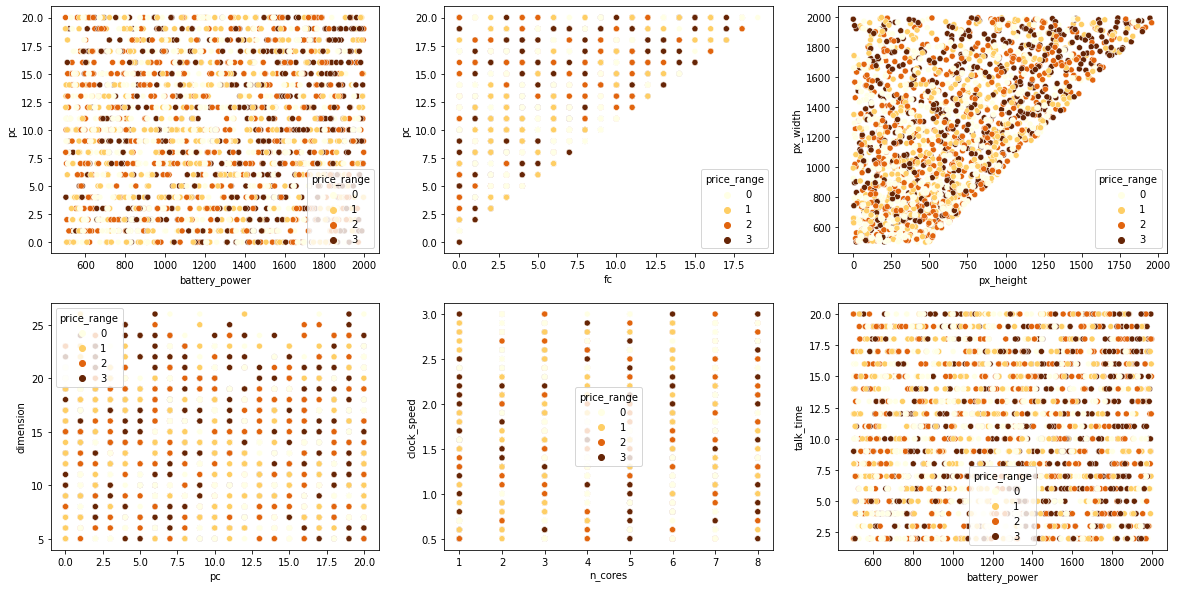

In [69]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
sns.scatterplot(data = df_resize, x= 'battery_power', y='pc', hue='price_range', ax=ax[0, 0], palette='YlOrBr')
sns.scatterplot(data = df_resize, x= 'fc', y='pc', hue='price_range', ax=ax[0, 1], palette='YlOrBr')
sns.scatterplot(data = df_resize, x= 'px_height', y='px_width', hue='price_range', ax=ax[0, 2], palette='YlOrBr')
sns.scatterplot(data = df_resize, x= 'pc', y='dimension', hue='price_range', ax=ax[1, 0], palette = 'YlOrBr')
sns.scatterplot(data = df_resize, x= 'n_cores', y='clock_speed', hue='price_range', ax=ax[1, 1], palette='YlOrBr')
sns.scatterplot(data = df_resize, x= 'battery_power', y='talk_time',  hue='price_range', ax=ax[1, 2], palette='YlOrBr')

plt.show()


- In my hypothesis, especially for me when I'm looking for cellphone I will see the `Battery` and `Primary Camera` but this data don't show any relations that we can conclude those attribute on cellphone can't describe the price of the cellphone
- Even the size of the cellphone can't provide information that can determine the price of the cellphone 

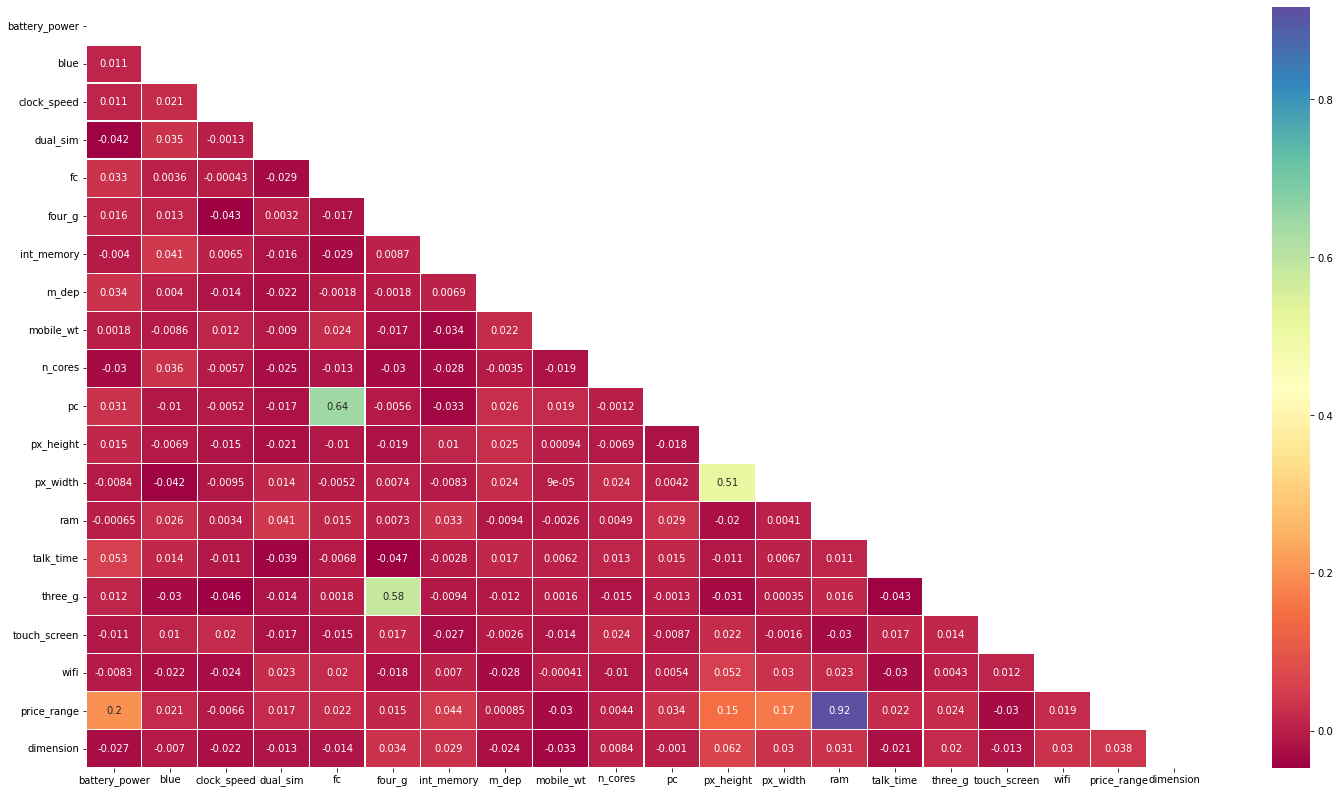

In [70]:
masking = np.triu(df_resize.corr())
plt.figure(figsize=(25,14))
sns.heatmap(df_resize.corr(), mask= masking, annot=True, linewidths=0.2, cmap=sns.color_palette("Spectral", as_cmap=True))
plt.show()

- As we say before, only `RAM` that has correlation with column target. 
- The other columns like size of a phone of course have collinearity but for size of a cellphone we not gonna make it into 1 column like screen. People might wanna see the actual size (width & height) in cm. 
- Same like `pc` and `fc` of course they have collinearity because both of them are `Camera` and we keep it that way
- `3G` and `4G` seems like have collinearity, but thats okay
- And we can see that, `Battery power` seems like have an impact to `Price range` too but not powerfull like `RAM`

# Pre-processing Data

We need to check if data clean enough before go to Model Machine Learning

## Data Cleaning

In [71]:
df_resize.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dimension        0
dtype: int64

In [72]:
df_resize.duplicated().sum()

0

Data is clean enough to go to the next step

In [73]:
#Define all data for modelling
X_train.shape, y_train.shape

((1400, 20), (1400,))

Here we want to do decide which `n_components` is the optimal one before we use put data on Machine Learning Model

In [74]:
X_train['dimension'] = np.sqrt((X_train['sc_h']**2) + (X_train['sc_w']**2)).astype(int)
X_train.drop(columns=['sc_h', 'sc_w'], inplace=True)

In [75]:
scaler = StandardScaler()
scaling = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled.shape

(1400, 19)

In [76]:
#Define how many features that will be optimal for modelling

pca = PCA(n_components=19).fit(X_train_scaled)
pca.explained_variance_ratio_

array([0.08848591, 0.08509234, 0.08080279, 0.06290372, 0.05810773,
       0.05659058, 0.05502829, 0.05399138, 0.05363451, 0.05271857,
       0.05108128, 0.04928487, 0.04839969, 0.04798021, 0.04640429,
       0.04534784, 0.02478348, 0.02142992, 0.01793261])

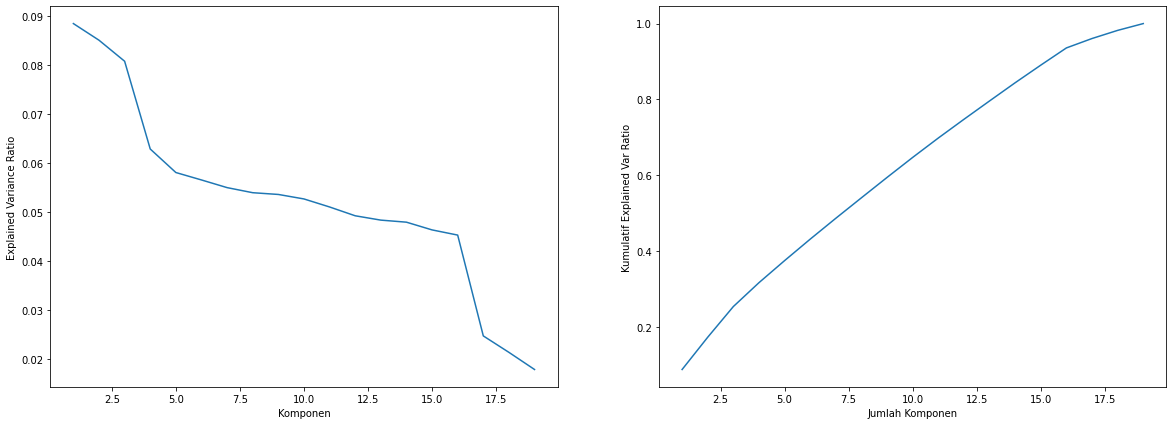

In [77]:
fig,ax=plt.subplots(ncols=2,figsize=(20,7))
ax[0].plot(range(1,20),pca.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,20),np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

From Explained Var Ratio we can see that with `17 Features` we get information more than 90% and that's enough, so for `Features` using PCA we gonna drop 2 column

# Model Definition

For Machine learning model we gonna compare some of `Classifier` (SVC, RandomForest, Decission Tree, KNN, GradientBoosting) model to see which one is perform better and we gonna compare which one perform well with `StandardScaler` or `MinMaxScaler` and after doing `PCA` of course And we will put in pipeline 1 by 1 (except scaling and pca)

In [78]:
#We define X and y for data test
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
115,1900,1,2.3,0,1,1,18,0.2,89,7,9,1055,1661,2871,12,1,13,1,1,1
1779,1807,1,2.9,0,0,0,16,0.2,125,3,0,1221,1415,2921,8,5,17,0,1,0
1449,602,0,0.9,0,9,0,50,0.9,141,8,18,1571,1717,2189,7,5,16,0,1,0
145,1814,0,1.4,1,1,1,9,0.4,141,2,2,756,786,3556,18,12,16,1,0,0
1009,1881,0,2.2,0,4,0,51,0.3,158,5,7,477,1553,1229,12,0,14,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1154,0,0.5,0,12,1,14,0.7,156,7,14,251,1801,587,8,3,4,1,1,1
870,1673,0,2.8,1,7,0,9,0.1,187,3,10,65,734,3669,9,1,10,1,0,1
1827,1692,0,2.1,0,4,1,2,0.9,106,1,17,1899,1904,3779,9,3,7,1,1,1
1533,642,1,0.5,0,0,1,38,0.8,86,5,10,887,1775,435,9,2,2,1,1,0


In [79]:
X_test['dimension'] = np.sqrt((X_test['sc_h']**2) + (X_test['sc_w']**2)).astype(int)
X_test.drop(columns=['sc_h', 'sc_w'], inplace=True)
X_test.shape

(600, 19)

# Pipeline

## SVC

In [80]:
pipe_svc = make_pipeline(PCA(n_components=17), StandardScaler(), SVC())

In [81]:
param_svc = {'svc__gamma' : [0.001, 0.01, 0.1], 
             'svc__C' : [1, 10, 100], 
             'standardscaler' : [StandardScaler(), MinMaxScaler()]}

## Random Forest

In [82]:
pipe_rnf = make_pipeline(PCA(n_components=17), StandardScaler(), RandomForestClassifier())

In [83]:
param_rnf = {'randomforestclassifier__n_estimators' : [200, 300, 400, 500],
             'randomforestclassifier__max_features' : [1, 2, 3],
             'standardscaler' : [StandardScaler(), MinMaxScaler()]}

## Decission Tree

In [84]:
pipe_dct = make_pipeline(PCA(n_components=17), StandardScaler(), DecisionTreeClassifier())

In [85]:
param_dct = {'decisiontreeclassifier__max_depth' : [2, 3, 4, 5],
             'decisiontreeclassifier__min_impurity_decrease': [0.0, 0.1, 0.2, 0.3],
             'standardscaler' : [StandardScaler(), MinMaxScaler()]}

## KNN

In [86]:
pipe_knn = make_pipeline(PCA(n_components=17), StandardScaler(), KNeighborsClassifier())

In [87]:
param_knn = {'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
             'kneighborsclassifier__weights': ['uniform', 'distance'],
             'kneighborsclassifier__leaf_size': [15, 20],
             'standardscaler' : [StandardScaler(), MinMaxScaler()]}

## Gradient Boosting

In [88]:
pipe_gdb = make_pipeline(PCA(n_components=17), StandardScaler(), GradientBoostingClassifier())

In [89]:
param_gdb = {'gradientboostingclassifier__n_estimators' : [200, 300, 400, 500],
             'gradientboostingclassifier__learning_rate': [0.1, 0.01, 0.001],
             'standardscaler' : [StandardScaler(), MinMaxScaler()]}

# Model Training

## SVC

In [90]:
grid_svc = GridSearchCV(pipe_svc, param_grid=param_svc, cv=10, n_jobs=1)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA(n_components=17)),
                                       ('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=1,
             param_grid={'standardscaler': [StandardScaler(), MinMaxScaler()],
                         'svc__C': [1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1]})

In [91]:
print("Best cross-validation accuracy: {:.2f}".format(grid_svc.best_score_))
print("Best parameters: ", grid_svc.best_params_)
print("Test set accuracy: {:.2f}".format(grid_svc.score(X_test, y_test)))
pred_svc = grid_svc.predict(X_test)

Best cross-validation accuracy: 0.95
Best parameters:  {'standardscaler': StandardScaler(), 'svc__C': 100, 'svc__gamma': 0.001}
Test set accuracy: 0.96


## Random Forest

In [92]:
grid_rnf = GridSearchCV(pipe_rnf, param_grid=param_rnf, cv=10, n_jobs=1)
grid_rnf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA(n_components=17)),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=1,
             param_grid={'randomforestclassifier__max_features': [1, 2, 3],
                         'randomforestclassifier__n_estimators': [200, 300, 400,
                                                                  500],
                         'standardscaler': [StandardScaler(), MinMaxScaler()]})

In [93]:
print("Best cross-validation accuracy: {:.2f}".format(grid_rnf.best_score_))
print("Best parameters: ", grid_rnf.best_params_)
print("Test set accuracy: {:.2f}".format(grid_rnf.score(X_test, y_test)))
pred_rnf = grid_rnf.predict(X_test)

Best cross-validation accuracy: 0.88
Best parameters:  {'randomforestclassifier__max_features': 3, 'randomforestclassifier__n_estimators': 500, 'standardscaler': MinMaxScaler()}
Test set accuracy: 0.85


## Decission Tree

In [94]:
grid_dct = GridSearchCV(pipe_dct, param_grid=param_dct, cv=10, n_jobs=1)
grid_dct.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA(n_components=17)),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=1,
             param_grid={'decisiontreeclassifier__max_depth': [2, 3, 4, 5],
                         'decisiontreeclassifier__min_impurity_decrease': [0.0,
                                                                           0.1,
                                                                           0.2,
                                                                           0.3],
                         'standardscaler': [StandardScaler(), MinMaxScaler()]})

In [95]:
print("Best cross-validation accuracy: {:.2f}".format(grid_dct.best_score_))
print("Best parameters: ", grid_dct.best_params_)
print("Test set accuracy: {:.2f}".format(grid_dct.score(X_test, y_test)))
pred_dct = grid_dct.predict(X_test)

Best cross-validation accuracy: 0.84
Best parameters:  {'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_impurity_decrease': 0.0, 'standardscaler': StandardScaler()}
Test set accuracy: 0.84


## KNN

In [96]:
grid_knn = GridSearchCV(pipe_knn, param_grid=param_knn, cv=10, n_jobs=1)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA(n_components=17)),
                                       ('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=1,
             param_grid={'kneighborsclassifier__leaf_size': [15, 20],
                         'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance'],
                         'standardscaler': [StandardScaler(), MinMaxScaler()]})

In [97]:
print("Best cross-validation accuracy: {:.2f}".format(grid_knn.best_score_))
print("Best parameters: ", grid_knn.best_params_)
print("Test set accuracy: {:.2f}".format(grid_knn.score(X_test, y_test)))
pred_knn = grid_knn.predict(X_test)

Best cross-validation accuracy: 0.59
Best parameters:  {'kneighborsclassifier__leaf_size': 15, 'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__weights': 'distance', 'standardscaler': MinMaxScaler()}
Test set accuracy: 0.58


## Gradient Boosting

In [98]:
grid_gdb = GridSearchCV(pipe_gdb, param_grid=param_gdb, cv=10, n_jobs=1)
grid_gdb.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA(n_components=17)),
                                       ('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=1,
             param_grid={'gradientboostingclassifier__learning_rate': [0.1,
                                                                       0.01,
                                                                       0.001],
                         'gradientboostingclassifier__n_estimators': [200, 300,
                                                                      400,
                                                                      500],
                         'standardscaler': [StandardScaler(), MinMaxScaler()]})

In [99]:
print("Best cross-validation accuracy: {:.2f}".format(grid_gdb.best_score_))
print("Best parameters: ", grid_gdb.best_params_)
print("Test set accuracy: {:.2f}".format(grid_gdb.score(X_test, y_test)))
pred_gdb = grid_gdb.predict(X_test)

Best cross-validation accuracy: 0.89
Best parameters:  {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__n_estimators': 300, 'standardscaler': MinMaxScaler()}
Test set accuracy: 0.90


# Data Evaluation

As we know our Target Column `Range Price` equally distributed it means we can use `Accuracy` to evaluate our model, is it a good model or not.

And because we use `Pipeline` to do our modelling, we can't see other model result, instead we only can see `Best Score` of Accuracy

We only can compare

In [100]:
print("                   SVC Classifier")
print("=====================================================")
print(classification_report(y_test, pred_svc))
print("=====================================================")
print("                   Accuracy Score ")
print("=====================================================")
print("                       ", accuracy_score(y_test, pred_svc).round(3))

                   SVC Classifier
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       140
           1       0.95      0.95      0.95       157
           2       0.98      0.93      0.95       157
           3       0.97      0.99      0.98       146

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

                   Accuracy Score 
                        0.963


In [101]:
print("                Random Forest Classifier")
print("=====================================================")
print(classification_report(y_test, pred_rnf))
print("=====================================================")
print("                   Accuracy Score ")
print("=====================================================")
print("                      ", accuracy_score(y_test, pred_rnf).round(3))

                Random Forest Classifier
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       140
           1       0.80      0.81      0.81       157
           2       0.85      0.72      0.78       157
           3       0.88      0.96      0.92       146

    accuracy                           0.85       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.85      0.85      0.85       600

                   Accuracy Score 
                       0.855


In [102]:
print("               Decission Tree Classifier")
print("=====================================================")
print(classification_report(y_test, pred_dct))
print("=====================================================")
print("                   Accuracy Score ")
print("=====================================================")
print("                       ", accuracy_score(y_test, pred_dct).round(3))

               Decission Tree Classifier
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       140
           1       0.84      0.75      0.79       157
           2       0.78      0.80      0.79       157
           3       0.87      0.93      0.90       146

    accuracy                           0.84       600
   macro avg       0.84      0.85      0.84       600
weighted avg       0.84      0.84      0.84       600

                   Accuracy Score 
                        0.843


In [103]:
print("             K-Nearest Neighbor Classifier")
print("=====================================================")
print(classification_report(y_test, pred_knn))
print("=====================================================")
print("                   Accuracy Score ")
print("=====================================================")
print("                       ", accuracy_score(y_test, pred_knn).round(3))

             K-Nearest Neighbor Classifier
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       140
           1       0.49      0.44      0.46       157
           2       0.44      0.47      0.45       157
           3       0.71      0.64      0.67       146

    accuracy                           0.58       600
   macro avg       0.58      0.59      0.58       600
weighted avg       0.58      0.58      0.58       600

                   Accuracy Score 
                        0.578


In [104]:
print("             Gradient Boosting Classifier")
print("=====================================================")
print(classification_report(y_test, pred_gdb))
print("=====================================================")
print("                  Accuracy Score ")
print("=====================================================")
print("                      ", accuracy_score(y_test, pred_gdb).round(3))

             Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       140
           1       0.85      0.91      0.88       157
           2       0.89      0.80      0.84       157
           3       0.90      0.94      0.92       146

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.89       600

                  Accuracy Score 
                       0.895


- We can see that `SVC` is the model that has highest `Accuracy Score`, even almost perfect **(95.5%)**
- And worst model is `KNN` with `Accuracy Score` only **57.8%**

# Model Inference

For model Inference we gonna use `Data Test` original which this dataset actually provide from the begining

In [105]:
df_test = pd.read_csv('test.csv')
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


Before we predict we need to do the same thing like what we did on training data set

In [106]:
df_copy_test = df_test

In [107]:
df_copy_test['dimension'] = np.sqrt((df_copy_test['sc_h']**2) + (df_copy_test['sc_w']**2)).astype(int)
df_copy_test.drop(columns=['sc_h', 'sc_w', 'id'], inplace=True)
df_copy_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,dimension
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,2,0,1,0,13
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,7,1,0,0,6
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,10,0,1,1,19
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,7,1,1,0,10
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,7,1,0,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,15,1,1,0,16
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,19,0,1,1,8
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,14,1,0,0,5
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,6,0,1,0,18


Because `SVC` has the highest `Accuracy`, so we gonna use that model for predict our **data test**

In [108]:
prediction = grid_svc.predict(df_copy_test)
df_copy_test['class_price'] = prediction

In [109]:
df_copy_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,dimension,class_price
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,2,0,1,0,13,3
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,7,1,0,0,6,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,10,0,1,1,19,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,7,1,1,0,10,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,7,1,0,1,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,15,1,1,0,16,2
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,19,0,1,1,8,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,14,1,0,0,5,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,6,0,1,0,18,2


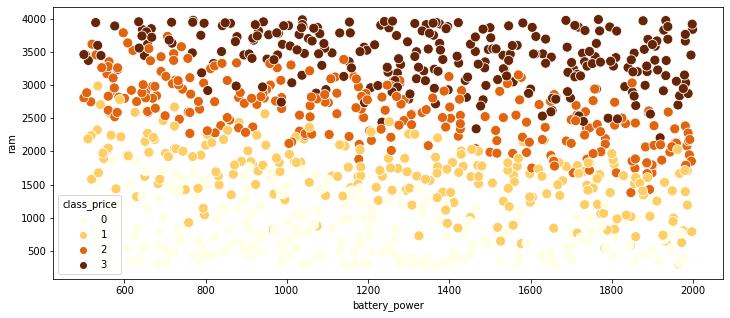

In [110]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data = df_copy_test, x= 'battery_power', y='ram', s=100, hue='class_price', palette='YlOrBr')
plt.show()

Not completely separated, but still our model can predict so well with 95% accuracy from `Support Vector CLassification`

# Summary

## Model Analysis

- We use several Model Machine Learning for slassification to predict range price of cellphones
- We did dimensionality reduction until `n_components = 17`
- We use `StandardScaler` and `MinMaxScaler` to compare which one is the best, and it turns out that there is `no differences`
- `Support Vector Classification` has the highest accuracy for prediction (95.5%)
- `K-Nearest Neighbor` has the lowest accuracy for prediction (57.8%)

## Overall Analysis

- Data was very clean, no missing values and no duplicated data
- From Exploration using `Pairplot` slightly we can see that only `RAM` features that affects target column `Price Range`
- After we examine deeper, using `Correlation` we can see only `RAM` that really affects the target column, with score up to `9.2`
- Feature screen width `sc_w` and screen height `sc_h`, we transform to only 1 Feature than can explain both of features
- New Features are `dimensions` contains size of screen phone diagonally in inch (using pythagoras)
- Then go to modelling, using pipeline to facilitate pre-processing
- `You can read on Model Analysis`
>System can predict the `Range Price` of a cellphone very well with 95.5% Accuracy, as long as there is `RAM` features